In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import TimeSeriesSplit

C:\Users\AP hatela\Miniconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os

In [3]:
pwd

'C:\\Users\\AP hatela\\greyatom\\capstone'

In [4]:
data = pd.read_csv('ts_data.csv')
data.head()

,Invoice_DateTime,Revenue
0,2015-01-02 11:30:36,4051.95
1,2015-01-03 10:07:32,1001.29
2,2015-01-03 11:12:57,233.14
3,2015-01-03 11:40:44,0.00
4,2015-01-03 12:07:17,2747.12


In [5]:
data['Invoice_DateTime'] = pd.to_datetime(data['Invoice_DateTime'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489329 entries, 0 to 489328
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_DateTime  489329 non-null  datetime64[ns]
 1   Revenue           489329 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.5 MB


In [7]:
data = data.set_index('Invoice_DateTime')
data.head(10)

,Revenue
Invoice_DateTime,
2015-01-02 11:30:36,4051.95
2015-01-03 10:07:32,1001.29
2015-01-03 11:12:57,233.14
2015-01-03 11:40:44,0.00
2015-01-03 12:07:17,2747.12
2015-01-03 12:10:08,865.92
2015-01-03 12:12:31,749.42
2015-01-03 12:18:54,0.00
2015-01-03 13:07:27,0.00


In [8]:
data.describe()

,Revenue
count,489329.000000
mean,4392.064792
std,11005.276144
min,0.000000
25%,299.140000
50%,1469.430000
75%,4422.210000
max,648203.490000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489329 entries, 2015-01-02 11:30:36 to 2016-06-30 17:09:19
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Revenue  489329 non-null  float64
dtypes: float64(1)
memory usage: 7.5 MB


In [10]:
data.isna().sum()

Revenue    0
dtype: int64

# Resampling

In [11]:
# daily revenue mean
data_daily = pd.DataFrame(data['Revenue'].resample('D').sum())
data_daily.isna().sum()

Revenue    0
dtype: int64

In [12]:
# daily revenue mean
data_daily_mean = pd.DataFrame(data['Revenue'].resample('D').mean())
data_daily_mean

,Revenue
Invoice_DateTime,
2012-04-02,2525.442000
2012-04-03,3455.840652
2012-04-04,2958.108205
2012-04-05,4157.551163
2012-04-06,5010.062245
...,...
2016-10-27,5062.880110
2016-10-28,6574.271255
2016-10-29,6361.319492


In [13]:
data_daily_mean.isna().sum()

Revenue    32
dtype: int64

In [14]:
data_daily_mean[data_daily_mean.Revenue.isna()].index

DatetimeIndex(['2012-04-08', '2012-04-15', '2012-04-22', '2012-05-01',
               '2012-05-13', '2012-05-20', '2012-06-03', '2012-06-10',
               '2012-06-17', '2012-07-01', '2012-07-08', '2012-07-15',
               '2012-07-22', '2012-08-05', '2012-08-12', '2012-08-15',
               '2012-08-19', '2012-09-02', '2012-09-09', '2012-09-16',
               '2012-09-19', '2012-09-23', '2012-10-02', '2012-10-07',
               '2012-10-14', '2012-11-13', '2013-01-26', '2013-05-01',
               '2013-10-02', '2014-01-26', '2014-05-01', '2014-08-15'],
              dtype='datetime64[ns]', name='Invoice_DateTime', freq=None)

In [15]:
data_daily_mean = data_daily_mean.interpolate(method='linear',limit_direction='forward')

In [16]:
data_daily_mean.isna().sum()

Revenue    0
dtype: int64

In [17]:
# csv to use for prophet
#data_daily_mean.to_csv('prophet_ts_data.csv', index=True)

In [18]:
data_daily_mean[data_daily_mean.Revenue.isna()]

,Revenue
Invoice_DateTime,


In [19]:
data_daily_mean

,Revenue
Invoice_DateTime,
2012-04-02,2525.442000
2012-04-03,3455.840652
2012-04-04,2958.108205
2012-04-05,4157.551163
2012-04-06,5010.062245
...,...
2016-10-27,5062.880110
2016-10-28,6574.271255
2016-10-29,6361.319492


(array([734503., 734869., 735234., 735599., 735964., 736330.]),
 <a list of 6 Text major ticklabel objects>)

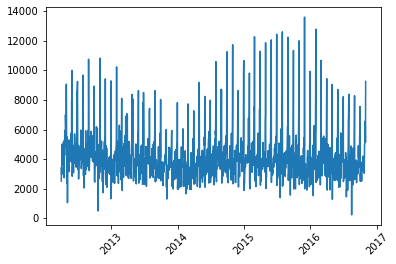

In [20]:
plt.plot(data_daily_mean)
plt.xticks(rotation = 45)

In [21]:
# weekly revenue mean
data_weekly_mean = pd.DataFrame(data['Revenue'].resample('W').mean())
data_weekly_mean

,Revenue
Invoice_DateTime,
2012-04-08,4102.454529
2012-04-15,4337.584495
2012-04-22,4868.543881
2012-04-29,6145.095149
2012-05-06,5883.889658
...,...
2016-10-09,3173.555150
2016-10-16,3660.103564
2016-10-23,3781.988184


In [22]:
data_weekly_mean.isna().sum()

Revenue    0
dtype: int64

Text(0.5, 1.0, 'Weekly basis')

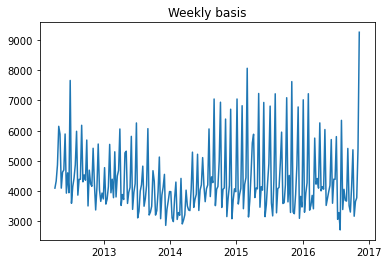

In [23]:
plt.plot(data_weekly_mean)
plt.title('Weekly basis')

The Revenue values are at a gap of mean of one week, we have 8 April 2012 followed by 15 April 2012, and so on. The first row above, labeled 2012–04-08, contains the mean of all the data contained in the time bin 2012–04–02 through 2012–04–08.

In [24]:
# monthly revenue mean
data_monthly_mean = pd.DataFrame(data['Revenue'].resample('M').mean())
data_monthly_mean

,Revenue
Invoice_DateTime,
2012-04-30,5279.898427
2012-05-31,4868.097734
2012-06-30,5075.266891
2012-07-31,4773.966628
2012-08-31,4642.934838
2012-09-30,4798.781438
2012-10-31,4479.500471
2012-11-30,4448.283828
2012-12-31,4118.831815


The Revenue values are at a gap of mean of one month, we have 30 April 2012 followed by 31 May 2012, and so on. The first row above, labeled 2012–04-30, contains the mean of all the data from start of month to last day of same month.

In [25]:
data_monthly_mean.isna().sum()

Revenue    0
dtype: int64

Text(0.5, 1.0, 'Monthly basis')

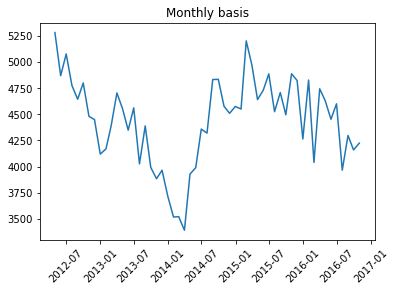

In [26]:
plt.plot(data_monthly_mean)
plt.xticks(rotation = 45)
plt.title('Monthly basis')

In [27]:
# yearly clv mean
data_yearly_mean = pd.DataFrame(data['Revenue'].resample('Y').mean())
data_yearly_mean

,Revenue
Invoice_DateTime,
2012-12-31,4668.855766
2013-12-31,4137.794234
2014-12-31,4171.878103
2015-12-31,4697.382569
2016-12-31,4351.491239


In [28]:
data_yearly_mean.isna().sum()

Revenue    0
dtype: int64

(array([734869., 735050., 735234., 735415., 735599., 735780., 735964.,
        736146., 736330.]), <a list of 9 Text major ticklabel objects>)

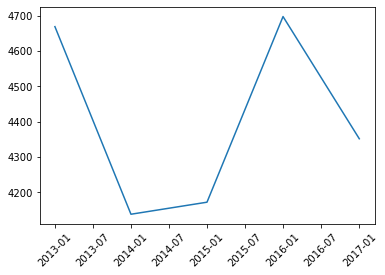

In [29]:
plt.plot(data_yearly_mean)
plt.xticks(rotation = 45)

# Rolling windows

In [30]:
# 7-D (weekly) rolling window
data_7d_rol = data_daily_mean['Revenue'].rolling(window = 7, center = True).mean()
data_7d_rol

Invoice_DateTime
2012-04-02            NaN
2012-04-03            NaN
2012-04-04            NaN
2012-04-05    3801.671540
2012-04-06    3951.137494
                 ...     
2016-10-27    5353.393970
2016-10-28    6061.439936
2016-10-29            NaN
2016-10-30            NaN
2016-10-31            NaN
Freq: D, Name: Revenue, Length: 1674, dtype: float64

As you can see, the mean Revenue value (3801.67) in 2012–04–05 was calculated by averaging the values from 2012–04–02 to 2012–04–08. Similarly, the mean Revenue value (3951.13) in 2012–04–06 was calculated by averaging the values from 2012–04–03 to 2012–04–09 and so on.

By the same logic, to calculate the mean consumption value for 2012–04–04, we would need to average the values from 2012–04–01 to 2012–04–07. However, the data before 2012-04-02 is missing and thus we obtain a Null for the first and last few rows.

In [31]:
# 365-D (yearly) rolling window
data_365d_rol = data_daily_mean['Revenue'].rolling(window = 365, center = True).mean()
data_365d_rol

Invoice_DateTime
2012-04-02   NaN
2012-04-03   NaN
2012-04-04   NaN
2012-04-05   NaN
2012-04-06   NaN
              ..
2016-10-27   NaN
2016-10-28   NaN
2016-10-29   NaN
2016-10-30   NaN
2016-10-31   NaN
Freq: D, Name: Revenue, Length: 1674, dtype: float64

In [32]:
data_365d_rol[182:-182]

Invoice_DateTime
2012-10-01    4376.056983
2012-10-02    4376.833659
2012-10-03    4377.474453
2012-10-04    4379.907269
2012-10-05    4379.250883
                 ...     
2016-04-28    4003.687625
2016-04-29    4002.427693
2016-04-30    4001.173159
2016-05-01    3982.400215
2016-05-02    4001.475310
Freq: D, Name: Revenue, Length: 1310, dtype: float64

In [33]:
data_365d_rol[-183:]

Invoice_DateTime
2016-05-02    4001.47531
2016-05-03           NaN
2016-05-04           NaN
2016-05-05           NaN
2016-05-06           NaN
                 ...    
2016-10-27           NaN
2016-10-28           NaN
2016-10-29           NaN
2016-10-30           NaN
2016-10-31           NaN
Freq: D, Name: Revenue, Length: 183, dtype: float64

Text(0.5, 1.0, 'Trends in Revenue')

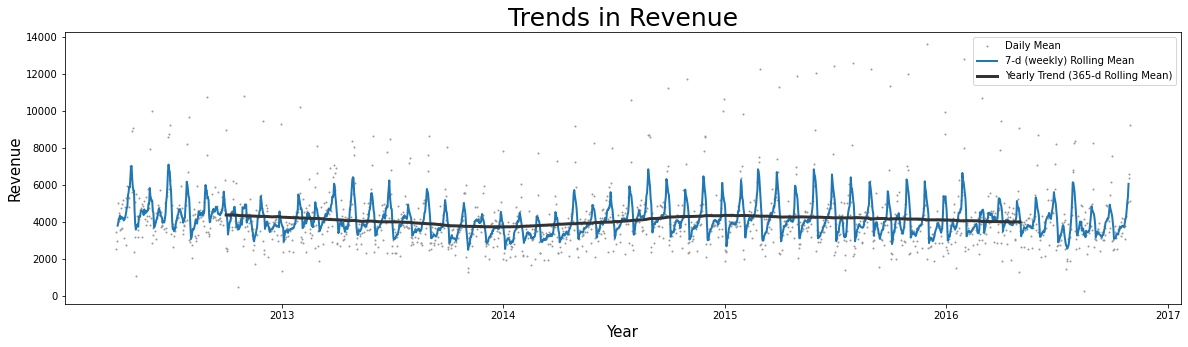

In [34]:
fig, ax = plt.subplots(figsize = (20,5))

# plotting daily data
ax.plot(data_daily_mean['Revenue'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily Mean')

# plotting 7-day rolling data
ax.plot(data_7d_rol, linewidth=2, label='7-d (weekly) Rolling Mean')

# plotting annual rolling data
ax.plot(data_365d_rol, color='0.2', linewidth=3, label='Yearly Trend (365-d Rolling Mean)')

# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Revenue', fontsize=15)
ax.set_title('Trends in Revenue', fontsize=25)

Looking at the 365-day rolling mean time series, we can see that the overall annual trend in Revenue is fairly stable with low Revenue recorded around 2014.

# De-trending by differencing

In [35]:
# creating the first order differencing data
data_1_diff = pd.DataFrame(data_daily_mean['Revenue'].diff())
data_1_diff

,Revenue
Invoice_DateTime,
2012-04-02,NaN
2012-04-03,930.398652
2012-04-04,-497.732447
2012-04-05,1199.442958
2012-04-06,852.511082
...,...
2016-10-27,44.874923
2016-10-28,1511.391145
2016-10-29,-212.951763


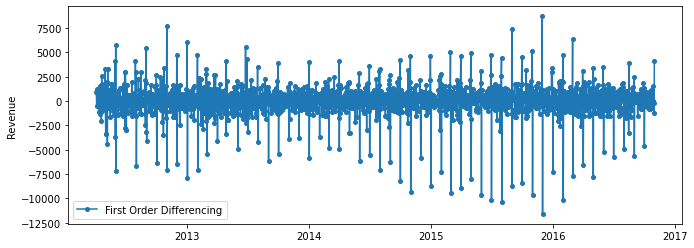

In [36]:
#start, end = '2012-04-02', '2014-12-31'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_1_diff, marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Revenue')
ax.legend()

(array([734503., 734869., 735234., 735599., 735964., 736330.]),
 <a list of 6 Text major ticklabel objects>)

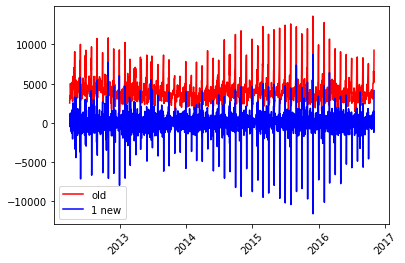

In [37]:
plt.plot(data_daily_mean['Revenue'], color='r', label='old')
plt.plot(data_1_diff, color='b', label='1 new')
plt.legend()
plt.xticks(rotation=45)

In [38]:
data_2_diff = pd.DataFrame(data_daily_mean['Revenue'] - 2*data_daily_mean['Revenue'].shift(1) + data_daily_mean['Revenue'].shift(2))
data_2_diff

,Revenue
Invoice_DateTime,
2012-04-02,NaN
2012-04-03,NaN
2012-04-04,-1428.131099
2012-04-05,1697.175405
2012-04-06,-346.931876
...,...
2016-10-27,38.944419
2016-10-28,1466.516222
2016-10-29,-1724.342908


(array([734503., 734869., 735234., 735599., 735964., 736330.]),
 <a list of 6 Text major ticklabel objects>)

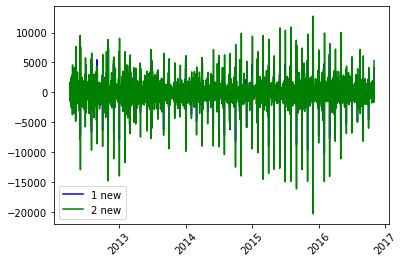

In [39]:
#plt.plot(data_daily_mean['Revenue'], color='r', label='old')
plt.plot(data_1_diff, color='b', label='1 new')
plt.plot(data_2_diff, color='g', label='2 new')
plt.legend()
plt.xticks(rotation=45)

# Prediction

In [40]:
df = data_1_diff

In [41]:
df.isna().sum()

Revenue    1
dtype: int64

In [42]:
df.interpolate(limit_direction='both', inplace=True)

In [43]:
df.isna().sum()

Revenue    0
dtype: int64

In [44]:
df

,Revenue
Invoice_DateTime,
2012-04-02,930.398652
2012-04-03,930.398652
2012-04-04,-497.732447
2012-04-05,1199.442958
2012-04-06,852.511082
...,...
2016-10-27,44.874923
2016-10-28,1511.391145
2016-10-29,-212.951763


In [45]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred)
    mean_squared_log_error=metrics.mean_squared_log_error(abs(y_true), abs(y_pred))
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('RMSLE: ', round(np.sqrt(mean_squared_log_error),4))

In [46]:
# inserting new column with yesterday's consumption values
df.loc[:,'Yesterday'] = df.loc[:,'Revenue'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
df.loc[:,'Yesterday_Diff'] = df.loc[:,'Yesterday'].diff()
# dropping NAs
df = df.dropna()

In [47]:
df

,Revenue,Yesterday,Yesterday_Diff
Invoice_DateTime,,,
2012-04-04,-497.732447,930.398652,0.000000
2012-04-05,1199.442958,-497.732447,-1428.131099
2012-04-06,852.511082,1199.442958,1697.175405
2012-04-07,-530.832458,852.511082,-346.931876
2012-04-08,-453.763057,-530.832458,-1383.343540
...,...,...,...
2016-10-27,44.874923,5.930504,-708.033031
2016-10-28,1511.391145,44.874923,38.944419
2016-10-29,-212.951763,1511.391145,1466.516222


In [48]:
X_train = df[:'2015'].drop(['Revenue'], axis = 1)
y_train = df.loc[:'2015', 'Revenue']
X_test = df['2016'].drop(['Revenue'], axis = 1)
y_test = df.loc['2016', 'Revenue']

model: mean score (std of score)
LR: 0.142298 (0.025818)
KNN: 0.244439 (0.119660)
RF: 0.152816 (0.163915)
SVR: -0.001874 (0.001336)


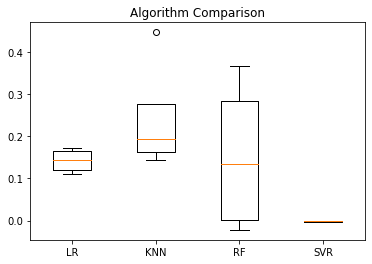

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 15))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

# Evaluate each model in turn
results = []
names = []
print('model: mean score (std of score)')
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [50]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [51]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
                }
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, 
                       cv=tscv, param_grid=param_search, 
                       scoring = rmse_score, n_jobs=5, 
                       verbose=2)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print(best_score, best_model)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    5.6s


-1397.4180532432003 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed:   11.7s finished


In [52]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
print('Results of GridSearch with Rf:')
regression_results(y_true, y_pred)

Results of GridSearch with Rf:
explained_variance:  0.2478
r2:  0.2455
MAE:  932.3783
MSE:  2090116.615
RMSE:  1445.7236
RMSLE:  1.7581


In [53]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()
param_search = { 
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree']
                }
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, 
                       cv=tscv, param_grid=param_search, 
                       scoring = rmse_score, n_jobs=5, 
                       verbose=2)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
print(best_score, best_model)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


-1428.7073173327635 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=5)]: Done  32 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done  63 out of  72 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:    1.7s finished


In [54]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
print('Results of GridSearch with KNN:')
regression_results(y_true, y_pred)

Results of GridSearch with KNN:
explained_variance:  0.2174
r2:  0.2132
MAE:  974.9941
MSE:  2179534.0001
RMSE:  1476.3245
RMSLE:  1.5901


In [55]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
param_search = { 
    'fit_intercept': [True, False],
    'normalize': [True, False],
                }
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, 
                       cv=tscv, param_grid=param_search, 
                       scoring = rmse_score, n_jobs=5, 
                       verbose=2)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
print(best_score, best_model)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


-1568.5596481730577 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=5)]: Done  16 out of  16 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  16 out of  16 | elapsed:    1.4s finished


In [56]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
print('Results of GridSearch with LR:')
regression_results(y_true, y_pred)

Results of GridSearch with LR:
explained_variance:  0.1358
r2:  0.1357
MAE:  1022.8208
MSE:  2394282.8331
RMSE:  1547.347
RMSLE:  1.7093


In [58]:
data_1_diff.describe()

,Revenue,Yesterday,Yesterday_Diff
count,1674.000000,1673.000000,1.672000e+03
mean,4.575502,2.123164,-1.282669e+00
std,1730.721637,1728.327369,2.837829e+03
min,-11601.032550,-11601.032550,-2.030857e+04
25%,-539.103723,-539.827110,-1.035334e+03
50%,106.425590,105.925228,9.094947e-13
75%,721.037609,719.478503,1.151817e+03
max,8707.537215,8707.537215,1.274215e+04
